# <span style='color:blue'> LAB2: </span>
# <span style='color:blue'> PYTORCH INTRODUCTION </span>

# <span style='color:red'> Part 1: Python as Deep Learning Platform -----------------------------------------------------</span>

### 1.1 - Verify PyTorch Installation

In [1]:
# Import necessary packages

import numpy as np
import torch

In [2]:
# Define a random torch tensor of shape (5, 3)

x = torch.rand(5, 3)
print(x)

tensor([[0.7560, 0.8688, 0.2156],
        [0.3465, 0.7244, 0.5154],
        [0.3566, 0.5991, 0.4860],
        [0.1151, 0.8717, 0.6082],
        [0.8969, 0.4408, 0.1913]])


In [3]:
# This lines ensures PyTorch can communicate with your GPU for hardware acceleration

torch.cuda.is_available()

False

# <span style='color:red'> Part 2: Neural Network Workflow in PyTorch (Simple Linear Regression) ----------</span>

### 2.1 - Prepare Data

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

In [5]:
# Generate training data for x and y

x_train = np.arange(11, dtype = np.float32)
x_train = x_train[:, np.newaxis] # [:, np.nexaxis] re-orient the x_train so that it's in vertical orientation

y_train = (2 * x_train) + 1

In [6]:
print(x_train)

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


In [7]:
print(y_train)

[[ 1.]
 [ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]


### 2.2 - Define Model

In [8]:
# A neural network model in PyTorch is a class 

class linearRegression(torch.nn.Module):
    
    def __init__(self, input_dim, output_dim): # Initializes the model with a linear layer with input/output dimension
        
        super(linearRegression, self).__init__() # This line allows us to use attributes/methods from torch.nn.Module
        
        self.linear = torch.nn.Linear(input_dim, output_dim) # Define a single linear layer with input/output dimensions

    def forward(self, x): # This function describes the information flow within the network from input -> output
        
        out = self.linear(x) # We only have a single layer so the network output = output of the linear layer 
        
        return out

### 2.3 - Select Hyperparameters

In [9]:
# Initialize our neural network model with input and output dimensions
model = linearRegression(input_dim = 1, output_dim = 1)

# Define the learning rate and epoch (# of iterations)
learning_rate = 0.01 
epochs = 100

# Define loss function and optimizer
loss_func = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Run this line if you have PyTorch GPU version
if torch.cuda.is_available():
    model.cuda()

### 2.4 - Identify Tracked Values

In [10]:
# Define a list or numpy array placeholder to keep track of our training loss

train_loss_list = []

### 2.5 - Train Model

In [11]:
# Convert our dataset (inputs and targets) into torch tensors

if torch.cuda.is_available():
    inputs = torch.from_numpy(x_train).cuda() # If using GPU version, transfer the dataset to GPU memory
    targets = torch.from_numpy(y_train).cuda()
else:
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

# TRAINING LOOP-------------------------------------------------------------------------

for epoch in range(epochs): # For each epoch (i.e. single pass on the training dataset)

    optimizer.zero_grad() # Empty the gradient buffer so each learning event per epoch is separate

    outputs = model(inputs) # Forward pass the inputs through the network to produce outputs 

    loss = loss_func(outputs, targets) # Compute the loss via comparing the output with expected targets
    
    train_loss_list.append(loss.item()) # Save the loss value to train_loss_list we defined
    
    loss.backward() # Compute how much changes to be made to weights/biases

    optimizer.step() # Update the weights/biases according to learning rate

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 110.89277648925781
epoch 1, loss 9.05661392211914
epoch 2, loss 0.750034511089325
epoch 3, loss 0.07236632704734802
epoch 4, loss 0.01696621999144554
epoch 5, loss 0.012323882430791855
epoch 6, loss 0.011823064647614956
epoch 7, loss 0.01166139543056488
epoch 8, loss 0.011528734117746353
epoch 9, loss 0.011399846524000168
epoch 10, loss 0.011272510513663292
epoch 11, loss 0.011146620847284794
epoch 12, loss 0.011022141203284264
epoch 13, loss 0.010899092070758343
epoch 14, loss 0.010777361690998077
epoch 15, loss 0.010657000355422497
epoch 16, loss 0.010537994094192982
epoch 17, loss 0.010420326143503189
epoch 18, loss 0.010303952731192112
epoch 19, loss 0.010188928805291653
epoch 20, loss 0.010075081139802933
epoch 21, loss 0.009962605312466621
epoch 22, loss 0.009851345792412758
epoch 23, loss 0.00974134262651205
epoch 24, loss 0.009632526896893978
epoch 25, loss 0.009524977765977383
epoch 26, loss 0.009418626315891743
epoch 27, loss 0.009313467890024185
epoch 28, loss 

### 2.6 - Visualization and Evaluation

In [12]:
with torch.no_grad(): # Telling PyTorch we aren't passing inputs to the model for training purpose, which requires gradient
    
    if torch.cuda.is_available(): # If you are using GPU version
        
        # 1. Convert x_train (np.array) -> torch tensors with torch.from_numpy()
        # 2. Transfer x_train to GPU using .cuda()
        # 3. Feed forward x_train to model to obtain the output using model()
        # 4. Since the model lives in GPU, we should bring back the model output to CPU with .cpu()
        # 5. Finally convert the torch tensor to numpy with .numpy()
        predicted = model(torch.from_numpy(x_train).cuda()).cpu().numpy() 
        
    else:
        
        # With CPU version, steps 2,3,4 above is not needed
        predicted = model(torch.from_numpy(x_train)).numpy()
    
    # Print the predicted outputs - i.e., y-values and weight and biases in the trained neural network
    print(predicted) 
    print("a: " + str(model.linear.weight.cpu().numpy()), "b: " + str(model.linear.bias.cpu().numpy()))

[[ 1.1198236]
 [ 3.1025677]
 [ 5.085312 ]
 [ 7.068056 ]
 [ 9.0508   ]
 [11.033545 ]
 [13.016289 ]
 [14.999033 ]
 [16.981777 ]
 [18.964521 ]
 [20.947266 ]]
a: [[1.9827442]] b: [1.1198236]


Text(0, 0.5, 'y')

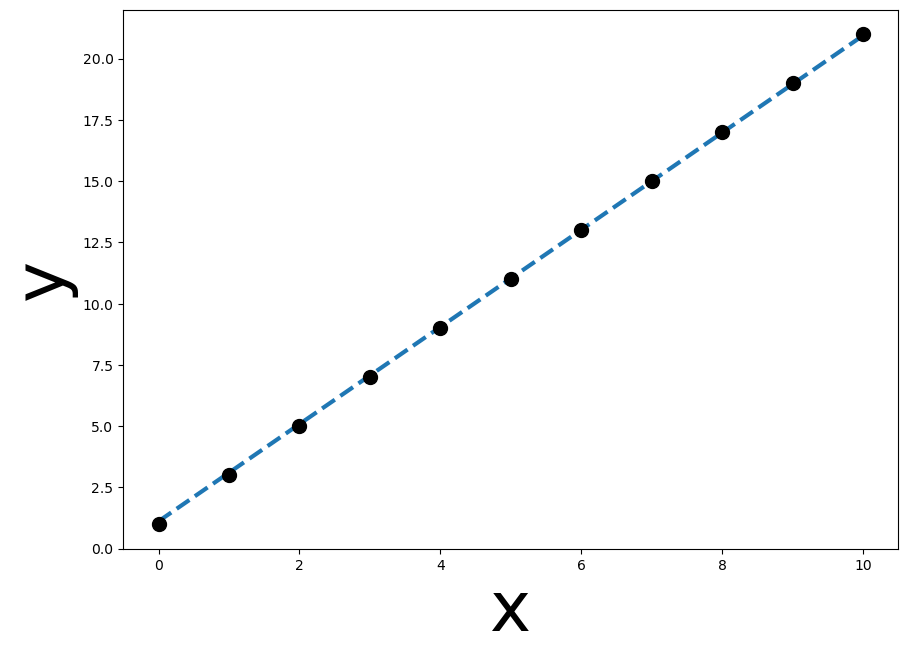

In [13]:
# Plot the predicted-y (blue line) vs expected targets (black dots)

plt.figure(figsize = (10, 7))

plt.plot(predicted, '--', linewidth = 3)
plt.plot(x_train, y_train, 'o', color = 'black', markersize = 10)
plt.xlabel('x', fontsize = 50)
plt.ylabel('y', fontsize = 50)

# <span style='color:red'> Part 3: Python Concepts for PyTorch ---------------------------------------------------------</span>

### 3.1 - Python Classes

In [ ]:
class Pokemon():
    def __init__(self, Name, Type, Health): # Define attributes for the Pokemon object
        self.Name = Name
        self.Type = Type 
        self.Health = Health
        
    # Define methods for the Pokemon object
    
    def whats_your_name(self): # Your method can directly use the attributes defined in __init__
        print("My name is " + self.Name + "!")

    def attack(self):
        print("Electric attack! Zap!!")

    def dodge(self):
        print("Pikachu Dodge!")

    def evolve(self):
        print("Evolving to Raichu!!")

In [ ]:
pk1 = Pokemon(Name = "Pikachu", Type = "Electric", Health = 70)

In [ ]:
pk1.Name

In [ ]:
pk1.whats_your_name()

In [ ]:
pk1.attack()

### 3.2 - PyTorch Tensors vs Numpy Arrays

In [ ]:
# Defining a numpy array
array1 = np.array([1,2,3,4]) 
print(array1, type(array1))

In [ ]:
# Defining a torch tensor
tensor1 = torch.tensor([1,2,3,4])
print(tensor1, type(tensor1))

In [ ]:
# Converting numpy array to torch tensor
array1_torch = torch.from_numpy(array1)
print(array1_torch, type(array1_torch))

In [ ]:
# Converting torch tensor to numpy array
tensor1_numpy = tensor1.numpy()
print(tensor1_numpy, type(tensor1_numpy))

### 3.3 - Handling Torch Tensors

In [ ]:
# Transferring your torch tensor to CPU
tensor1_cpu = tensor1.cpu()
print(tensor1_cpu.device)

In [ ]:
# Transferring your torch tensor to GPU
tensor1_gpu = tensor1.cuda()
print(tensor1_gpu.device)